In [2]:
import pandas as pd
import os
from os import listdir

In [5]:
import pandas as pd
data = pd.read_csv("C:\\Users\\HP\\Desktop\\data.csv")
preprocessed_data = pd.read_csv("C:\\Users\\HP\\Desktop\\preprocessed_data.csv")
raw_fighter_details = pd.read_csv("C:\\Users\\HP\\Desktop\\raw_fighter_details.csv")
raw_total_fight_data = pd.read_csv("C:\\Users\\HP\\Desktop\\raw_total_fight_data.csv")

In [6]:
print(data.shape, preprocessed_data.shape,  raw_fighter_details.shape, raw_total_fight_data.shape)
len(data['R_fighter'].unique())

(6012, 144) (5902, 160) (3596, 14) (6012, 1)


1514

In [7]:
data.dtypes.head()

R_fighter    object
B_fighter    object
Referee      object
date         object
location     object
dtype: object

In [8]:
from dateutil.parser import parse
def is_date(string, fuzzy=False):  
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

In [9]:

for cols in data.columns:
    coltype = data[cols].dtype
    if (coltype == 'object'):
        if(is_date(data.loc[0,cols])==True):
            data[cols] = pd.to_datetime(data[cols])
        else:
            data[cols] = data[cols].apply(str)        

In [10]:

def prodf(df):
    cat_var_value_cnt =10
    col_info = pd.DataFrame(columns=['col_name','data_type','variable_type','total_rows','unique_val_count',
                                     'non_missing_count','missing_count','most_common_val','max_value','min_value',
                                     'max_value_length','min_value_length'])
    col_info['col_name'] = df.columns
    col_info['total_rows'] = df.shape[0]
    row_cnt =0
    for item in df.columns:
        col_info.loc[row_cnt,'unique_val_count'] = len(df[item].unique())
        col_info.loc[row_cnt,'variable_type'] = 'Categorical' if len(df[item].unique())<=10 else 'Non-Categorical'
        col_info.loc[row_cnt,'data_type'] = df[item].dtype
        col_info.loc[row_cnt,'missing_count'] = df[item].isna().sum()
        col_info.loc[row_cnt,'non_missing_count'] = df.shape[0]-df[item].isna().sum()
        col_info.loc[row_cnt,'max_value'] = df.loc[df[item].isna()==False,[item]].max().max()
        col_info.loc[row_cnt,'min_value'] = df.loc[df[item].isna()==False,[item]].min().min()
        col_info.loc[row_cnt,'max_value_length'] = df[item].astype(str).str.len().max()
        col_info.loc[row_cnt,'min_value_length'] = df[item].astype(str).str.len().min()
        col_info.loc[row_cnt,'most_common_val'] = df[item].value_counts().idxmax()
        
        
        row_cnt = row_cnt+1
        
    return col_info

In [11]:
data_profile = prodf(data)
data_profile.head(5)

,col_name,data_type,variable_type,total_rows,unique_val_count,non_missing_count,missing_count,most_common_val,max_value,min_value,max_value_length,min_value_length
0,R_fighter,object,Non-Categorical,6012,1514,6012,0,Jim Miller,Zubaira Tukhugov,Aalon Cruz,25,7
1,B_fighter,object,Non-Categorical,6012,1987,6012,0,Jeremy Stephens,Zubaira Tukhugov,Aalon Cruz,25,7
2,Referee,object,Non-Categorical,6012,205,6012,0,Herb Dean,nan,Adam Cheadle,22,3
3,date,datetime64[ns],Non-Categorical,6012,550,6012,0,2016-11-19 00:00:00,2021-03-20 00:00:00,1994-03-11 00:00:00,10,10
4,location,object,Non-Categorical,6012,166,6012,0,"Las Vegas, Nevada, USA","Zagreb, Croatia","Abu Dhabi, Abu Dhabi, United Arab Emirates",43,12


In [12]:

del_cols =data_profile[data_profile['missing_count']>1000]['col_name']
data.head()
df = data.drop(del_cols,axis=1)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
df.shape

(6012, 95)

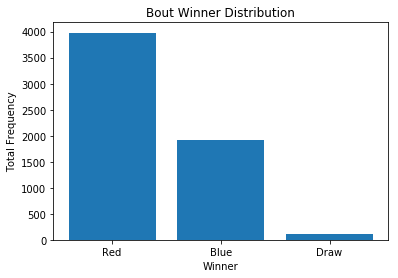

In [14]:

fig, ax= plt.subplots()
wdata = df['Winner'].value_counts()
#Get X and y Data
points= wdata.index
frequency=wdata.values
#Create bar charts
ax.bar(points,frequency)
#Set title and labels
ax.set_title('Bout Winner Distribution')
ax.set_xlabel('Winner')
ax.set_ylabel('Total Frequency')
SAVE_IMAGE_PATH = "C:\\Users\\HP\\Desktop"
plt.savefig(os.path.join(SAVE_IMAGE_PATH, 'BoutWinnerDistribution.svg'),
            quality=95, dpi=400, pad_inches=0.5, bbox_inches='tight')
plt.show()

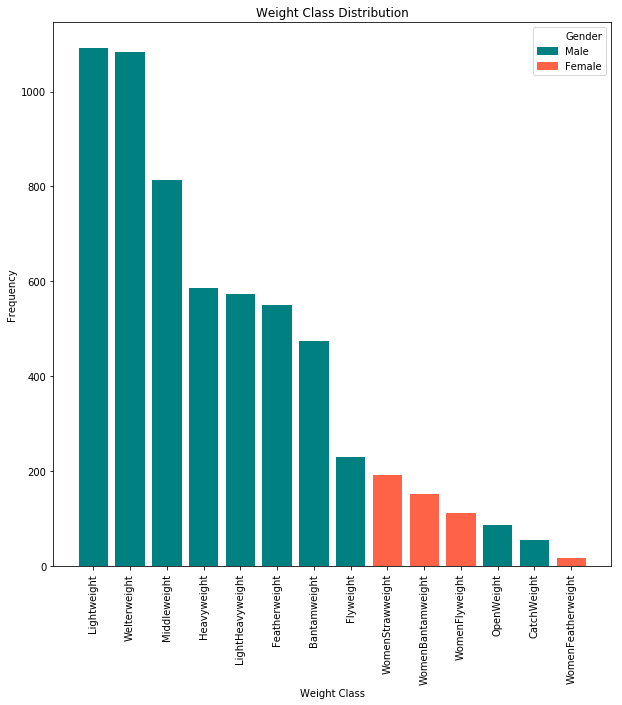

In [15]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 10))
wdata = df['weight_class'].value_counts()
points = wdata.index
frequency = wdata.values
ax.bar(points,frequency, color=['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'tomato', 'tomato', 'tomato', 'teal', 'teal', 'tomato'])
title = mpatches.Patch(color='white', label="Gender")
bluelabel = mpatches.Patch(color='teal', label='Male')
redlabel = mpatches.Patch(color='tomato', label='Female')
plt.legend(handles=[title,bluelabel,redlabel])
ax.set_title('Weight Class Distribution')
ax.set_xlabel('Weight Class')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
#SAVE_IMAGE_PATH = "C:\\Users\\HP\\Desktop"
#plt.savefig(os.path.join(SAVE_IMAGE_PATH, 'TEMPWeightClassDistibution.svg'),
#            quality=95, dpi=400, pad_inches=0.5, bbox_inches='tight')
plt.show()


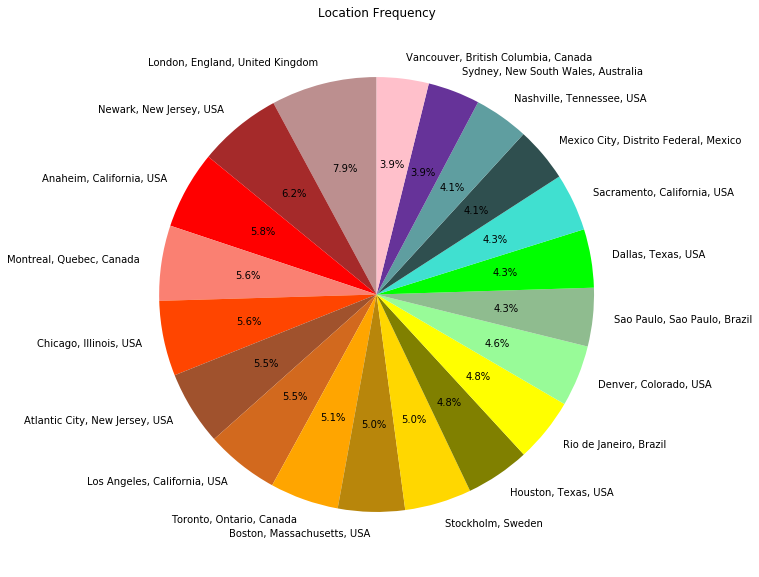

In [97]:
import numpy as np
fig, ax = plt.subplots(figsize=(10,10))
gdata = df['location'].value_counts()
y_data = gdata[2:].head(20).values
x_data = gdata[2:].head(20).index
shades = ["rosybrown", "brown", "red", "salmon", "orangered","sienna","chocolate","orange","darkgoldenrod","gold","olive","yellow","palegreen","darkseagreen","lime","turquoise","darkslategray","cadetblue","rebeccapurple","pink"]
plt.pie(y_data,labels = x_data,colors=shades, startangle=90, autopct='%1.1f%%')
plt.title('Location Frequency')

SAVE_IMAGE_PATH = "C:\\Users\\HP\\Desktop"
plt.savefig(os.path.join(SAVE_IMAGE_PATH, 'pieLocationBoutFrequeny.svg'),
           quality=95, dpi=400, pad_inches=0.5, bbox_inches='tight')
plt.show()